In [1]:

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
data=pd.read_csv('Copper_Set.xlsx - Result 1.csv')

In [3]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:

data.iloc[173086]

id               3C0A018F-4A85-4D96-A1AA-72BF0F7DC6DD
item_date                                  20200714.0
quantity tons                                       e
customer                                   30157111.0
country                                          78.0
status                                            Won
item type                                           W
application                                      41.0
thickness                                         0.5
width                                          1000.0
material_ref                                      NaN
product_ref                                 164141591
delivery date                              20200801.0
selling_price                                   672.0
Name: 173086, dtype: object

In [5]:
data['status'].value_counts()

status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [6]:
import numpy as np

# Check for NaN values in the 'quantity_tons' column
missing_values = data['quantity tons'].isnull().sum()

# Additionally, check for other common placeholders for missing values
missing_values += (data['quantity tons'] == -1).sum()  # Example: If -1 represents missing data
missing_values += (data['quantity tons'] == '').sum()  # Example: If empty string represents missing data

print("Total missing values in 'quantity_tons':", missing_values)

Total missing values in 'quantity_tons': 0


In [7]:
# Find and display the indices of rows with null values in the 'quantity_tons' column
null_indices = data[data['quantity tons'].isnull()]
null_indices

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price


## **DATA PREPROCSSING**

In [8]:
data_1 = data.copy()

In [9]:
data_1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [10]:
data_1.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [11]:
data_1.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [12]:
material_null=data_1['material_ref'].str.startswith("000000")
replace_null=(material_null==True)
data_1['material_ref'][replace_null]=np.NaN

In [13]:
data_1['material_ref'].isnull().sum()

100645

In [14]:
#replcing Nan value in material_ref by mode value of that column
data_1['material_ref'].fillna(data_1['material_ref'].mode()[0],inplace=True)
data_1['material_ref'].isnull().sum()

0

In [15]:
data_1.isnull().sum().sum()

61

In [16]:
#treating Null values with mean mediun mode values accordingly


data_1['customer'].fillna(data_1['customer'].mean(), inplace = True)
data_1['country'].fillna(data_1['country'].mean(), inplace = True)
data_1['application'].fillna(data_1['application'].mean(), inplace = True)
data_1['selling_price'].fillna(data_1['selling_price'].mean(), inplace = True)
data_1['delivery date'].fillna(data_1['delivery date'].mean(), inplace = True)

data_1['status'].fillna(data_1['status'].mode()[0], inplace = True)
data_1['item_date'].fillna(data_1['item_date'].mode()[0], inplace = True)

data_1['thickness'].fillna(data_1['thickness'].median(), inplace = True)

In [17]:
data_1.isnull().sum().sum()

2

In [18]:
data_1.dropna(inplace=True)

In [19]:
data_1.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [20]:
data_1.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [21]:
data_1.nunique()

id               181671
item_date           252
quantity tons    181671
customer           1170
country              18
status                9
item type             7
application          31
thickness           594
width              1386
material_ref      11495
product_ref          33
delivery date        29
selling_price      9796
dtype: int64

In [22]:
data_1.shape

(181671, 14)

In [23]:
data_1.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [24]:
data_1.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816710e+05,1.816710e+05,181671.000000,181671.000000,181671.000000,181671.000000,1.816710e+05,1.816710e+05,1.816710e+05
mean,2.020459e+07,3.051221e+07,44.893214,25.615711,2.564830,1295.290200,4.739731e+08,2.020738e+07,1.918047e+03
std,4.551111e+03,2.433388e+07,24.402400,17.752889,6.572338,261.631087,7.175123e+08,2.411065e+04,3.317966e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [25]:
#converting quantity value to numeric float type
data_1['quantity tons'] = pd.to_numeric(data_1['quantity tons'], errors='coerce')
data_1['item_date'] = pd.to_datetime(data_1['item_date'])
data_1['delivery date'] = pd.to_datetime(data_1['delivery date'])

In [26]:
# If this value is between: -0.5 and 0.5, the distribution of the value is almost symmetrical.
# -1 and -0.5, the data is negatively skewed, 
# and 
# f it is between 0.5 to 1, the data is positively skewed.

# EDA

In [27]:
#categorical variables
categorical_col=['status','item type','material_ref','product_ref']
#continuous variable
Continues_col = ['quantity tons','customer','country','application','thickness','width','selling_price']

In [28]:
for i in Continues_col:
    print(i,"--",data_1[i].skew())

quantity tons -- 424.6873099371783
customer -- 86.98482927867795
country -- 0.753635242319479
application -- 0.7244124224588578
thickness -- 303.4460810163655
width -- 0.37458349935712015
selling_price -- 301.3864288924798


In [29]:
#IQR DETECTION
def outliers_IQR(data_1):
    q1=data_1.quantile(0.25)
    q3=data_1.quantile(0.75)
    IQR=q3-q1
    low_r=(q1-1.5*IQR)
    high_r=(q3+1.5*IQR)
    #df.Petrol_tax = df.Petrol_tax.clip(upper_thershold , lower_thershold)---> other method to handling outlier(clip)
    outliers = data_1[((data_1<(low_r)) | (data_1>(high_r)))]
    return outliers,low_r,high_r

In [30]:
q3 = data_1.application.quantile(0.75)
q1 = data_1.application.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)

In [31]:
upper_tres ,lower_tres

(87.5, -36.5)

In [32]:
data_1.application = data_1.application.clip(upper_tres ,lower_tres)

<Axes: xlabel='application'>

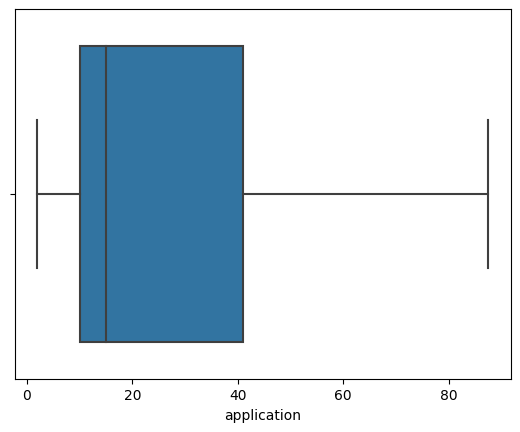

In [33]:
sns.boxplot(x=data_1['application'])

In [34]:
qt_outlier,qt_low,qt_high=outliers_IQR(data_1['quantity tons'])

app_outliers,app_low,app_upper=outliers_IQR(data_1['application'])

thickness_outliers,thickness_low,thickness_upper=outliers_IQR(data_1['thickness'])

width_outliers,width_low,width_upper=outliers_IQR(data_1['width'])

selling_outliers,selling_low,selling_upper=outliers_IQR(data_1['selling_price'])


In [35]:
min(selling_outliers),max(selling_outliers)



(-1160.0, 100001015.0)

In [36]:
# Find the minimum and maximum values of the 'quantity tons' column
min_quantity_tons = data_1['quantity tons'].min()
max_quantity_tons = data_1['quantity tons'].max()

print(f"Minimum quantity tons: {min_quantity_tons}")
print(f"Maximum quantity tons: {max_quantity_tons}")


Minimum quantity tons: -2000.0
Maximum quantity tons: 1000000000.0


In [37]:
# Find the minimum and maximum values of the 'quantity tons' column
min_quantity_tons = data_1['selling_price'].min()
max_quantity_tons = data_1['selling_price'].max()

print(f"Minimum quantity tons: {min_quantity_tons}")
print(f"Maximum quantity tons: {max_quantity_tons}")


Minimum quantity tons: -1160.0
Maximum quantity tons: 100001015.0


In [38]:
data_1['selling_price_out']=data_1['selling_price']
data_1['selling_price_out'] = np.where(data_1['selling_price_out'] >selling_upper, selling_upper,data_1['selling_price_out'])
data_1['selling_price_out'] = np.where(data_1['selling_price_out'] <selling_low, selling_low,data_1['selling_price_out'])

In [39]:
data_1['selling_price_out'].skew()

0.13659230260245983

In [40]:
data_1['quantity tons_log']=np.log(data_1['quantity tons'])

data_1['thickness_log'] = np.log(data_1['thickness'])

In [41]:
#data_1['thickness_log'] = np.log(data_1['thickness'])

<Figure size 800x600 with 0 Axes>

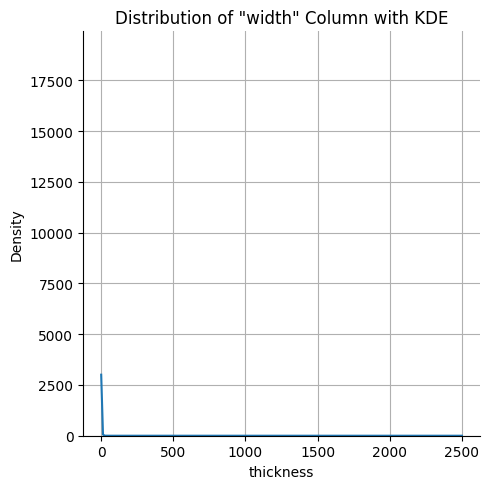

In [42]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data_1['thickness'], kde=True)
plt.xlabel('thickness')
plt.ylabel('Density')
plt.title('Distribution of "width" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

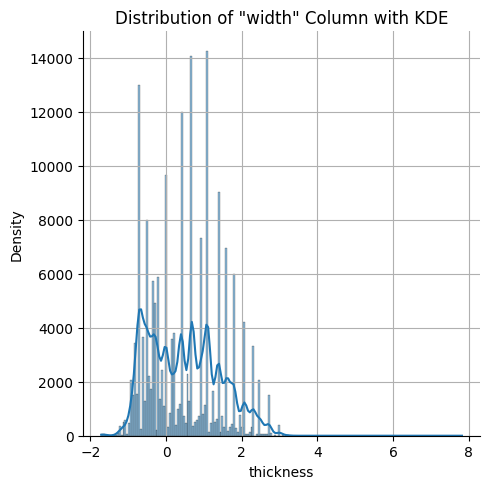

In [43]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.displot(data_1['thickness_log'], kde=True)
plt.xlabel('thickness')
plt.ylabel('Density')
plt.title('Distribution of "width" Column with KDE')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
data_1['quantity tons_log'].skew(),data_1['thickness_log'].skew()

(-0.06878249132733075, 0.3514353999155478)

In [45]:
data_1.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_out,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00,854.00,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01 00:00:00.020210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,1970-01-01 00:00:00.020210401,1047.00,1047.00,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01 00:00:00.020210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33,644.33,5.956169,-0.967584


In [46]:
Continues_col_out = ['quantity tons_log','customer','country','application','thickness_log','width','selling_price_out']

In [47]:
for i in Continues_col_out:
    print(i,"--",data_1[i].skew())

quantity tons_log -- -0.06878249132733075
customer -- 86.98482927867795
country -- 0.753635242319479
application -- 0.7074504802943667
thickness_log -- 0.3514353999155478
width -- 0.37458349935712015
selling_price_out -- 0.13659230260245983


EDA

<Axes: xlabel='quantity tons'>

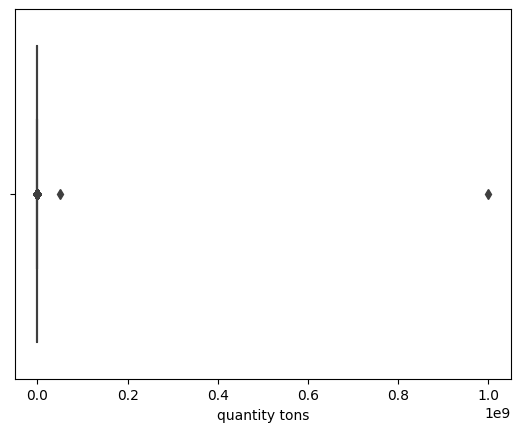

In [48]:
sns.boxplot(x=data_1['quantity tons'])

<Axes: xlabel='quantity tons_log'>

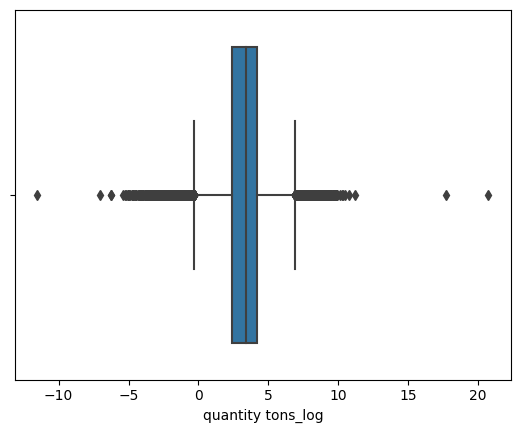

In [49]:
sns.boxplot(x=data_1['quantity tons_log'])

In [50]:
cols_plot=['quantity tons','quantity tons_log',
       'thickness','thickness_log','selling_price','selling_price_out']

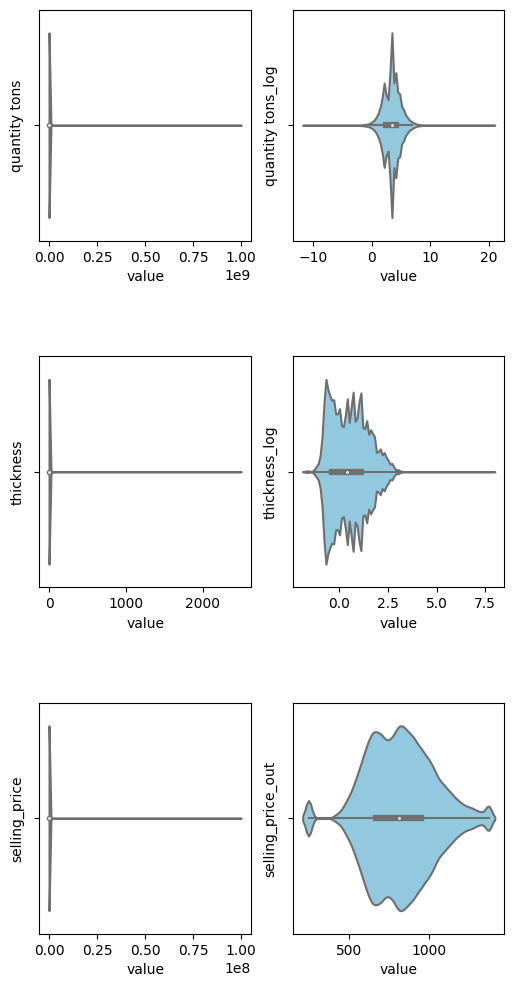

Text(0.5, 0.98, 'VIOLIN PLOT CONTINUOUS VARIABLE')

<Figure size 640x480 with 0 Axes>

In [51]:
# Select the features for the violin plot
fig, ax = plt.subplots((len(cols_plot)+1)//2, 2, figsize=(6, 12))
ax=ax.ravel()
for i, feature in enumerate(cols_plot):
    sns.violinplot(data=data_1, x=feature, ax=ax[i], color='skyblue')
    ax[i].set_xlabel('value')
    ax[i].set_ylabel(feature)
#sns.violinplot(data=df, x='selling_price_out', ax=ax[-1], color='skyblue')
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.suptitle("VIOLIN PLOT CONTINUOUS VARIABLE")

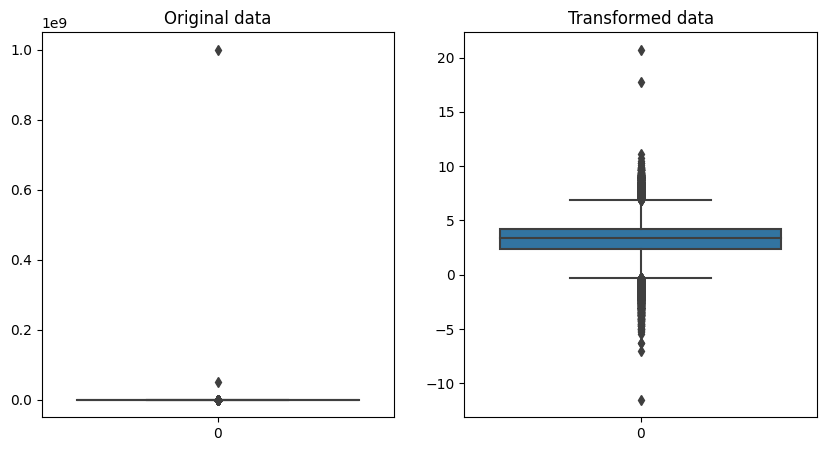

In [52]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data_1['quantity tons'], ax=ax[0])
sns.boxplot(data_1['quantity tons_log'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

<Axes: xlabel='thickness_log', ylabel='Density'>

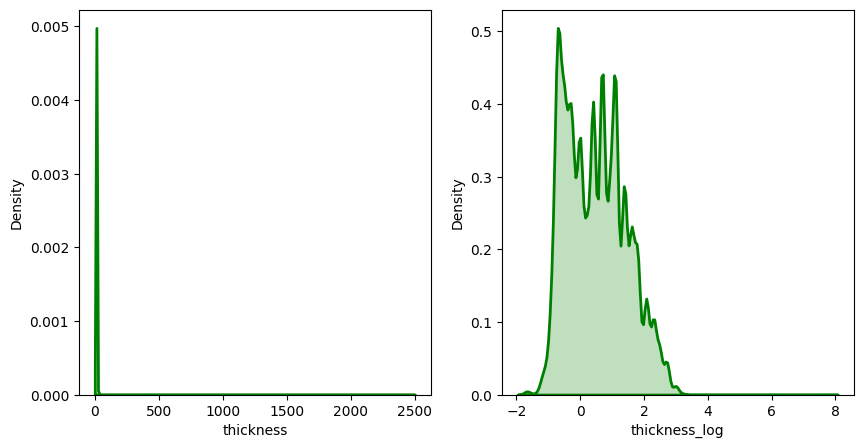

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(data_1['thickness'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(data_1['thickness_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

In [54]:
data_1['width_log'] = np.log(data_1['width'])

<Axes: xlabel='width_log', ylabel='Density'>

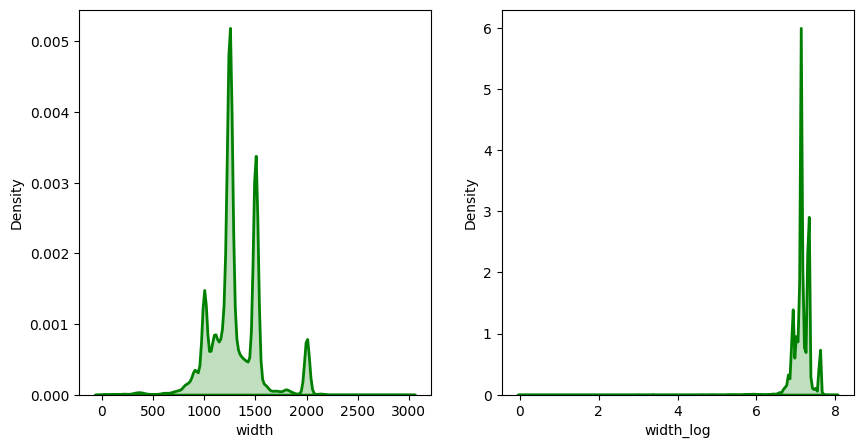

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(data_1['width'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(data_1['width_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

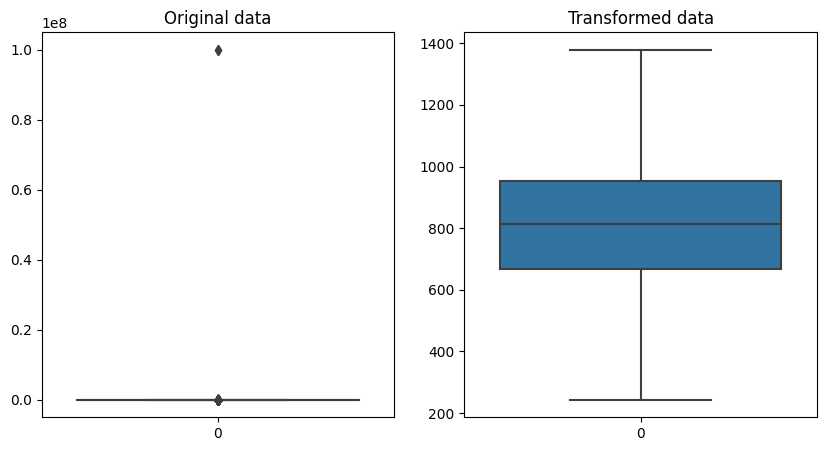

In [56]:
# Plot the original and transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data_1['selling_price'], ax=ax[0])
sns.boxplot(data_1['selling_price_out'], ax=ax[1])
ax[0].set_title("Original data")
ax[1].set_title("Transformed data")
plt.show()

<Axes: xlabel='quantity tons_log', ylabel='Density'>

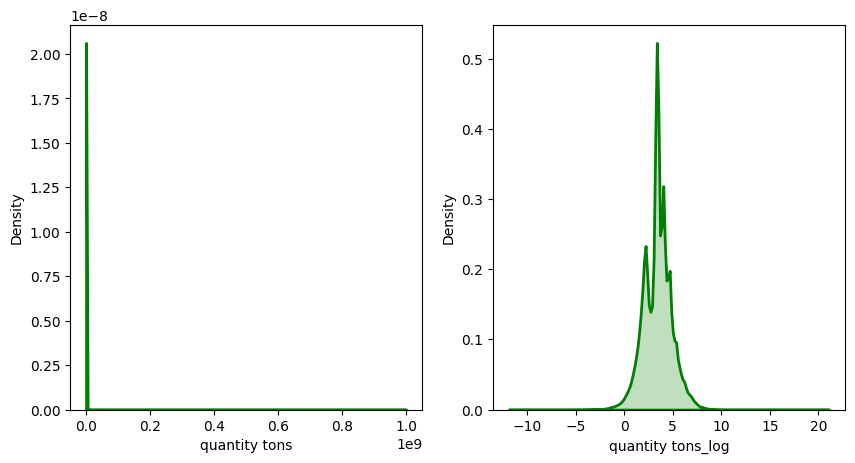

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(data_1['quantity tons'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(data_1['quantity tons_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

<Axes: xlabel='selling_price_out', ylabel='Density'>

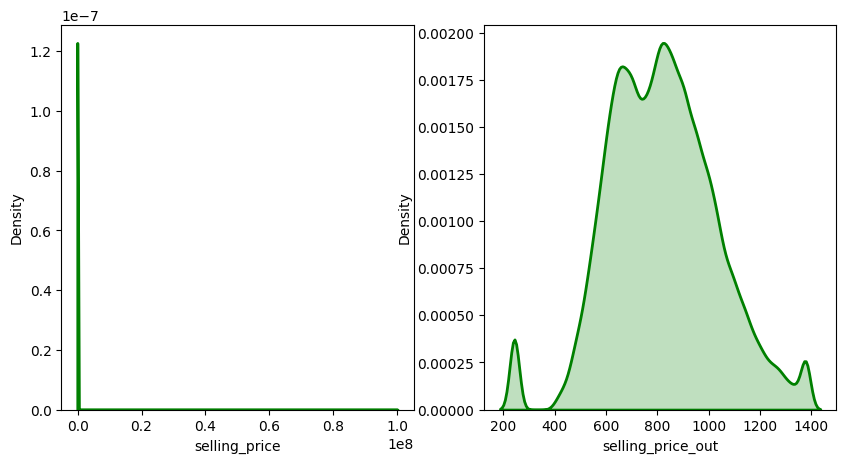

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(data_1['selling_price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[0])
sns.distplot(data_1['selling_price_out'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax=ax[1])

COORELATION

In [59]:
# Select only numeric columns from your DataFrame
#numeric_data = data_1.select_dtypes(include=[np.number])

# Create a correlation matrix for numeric columns
#correlation_matrix = numeric_data.corr().abs()




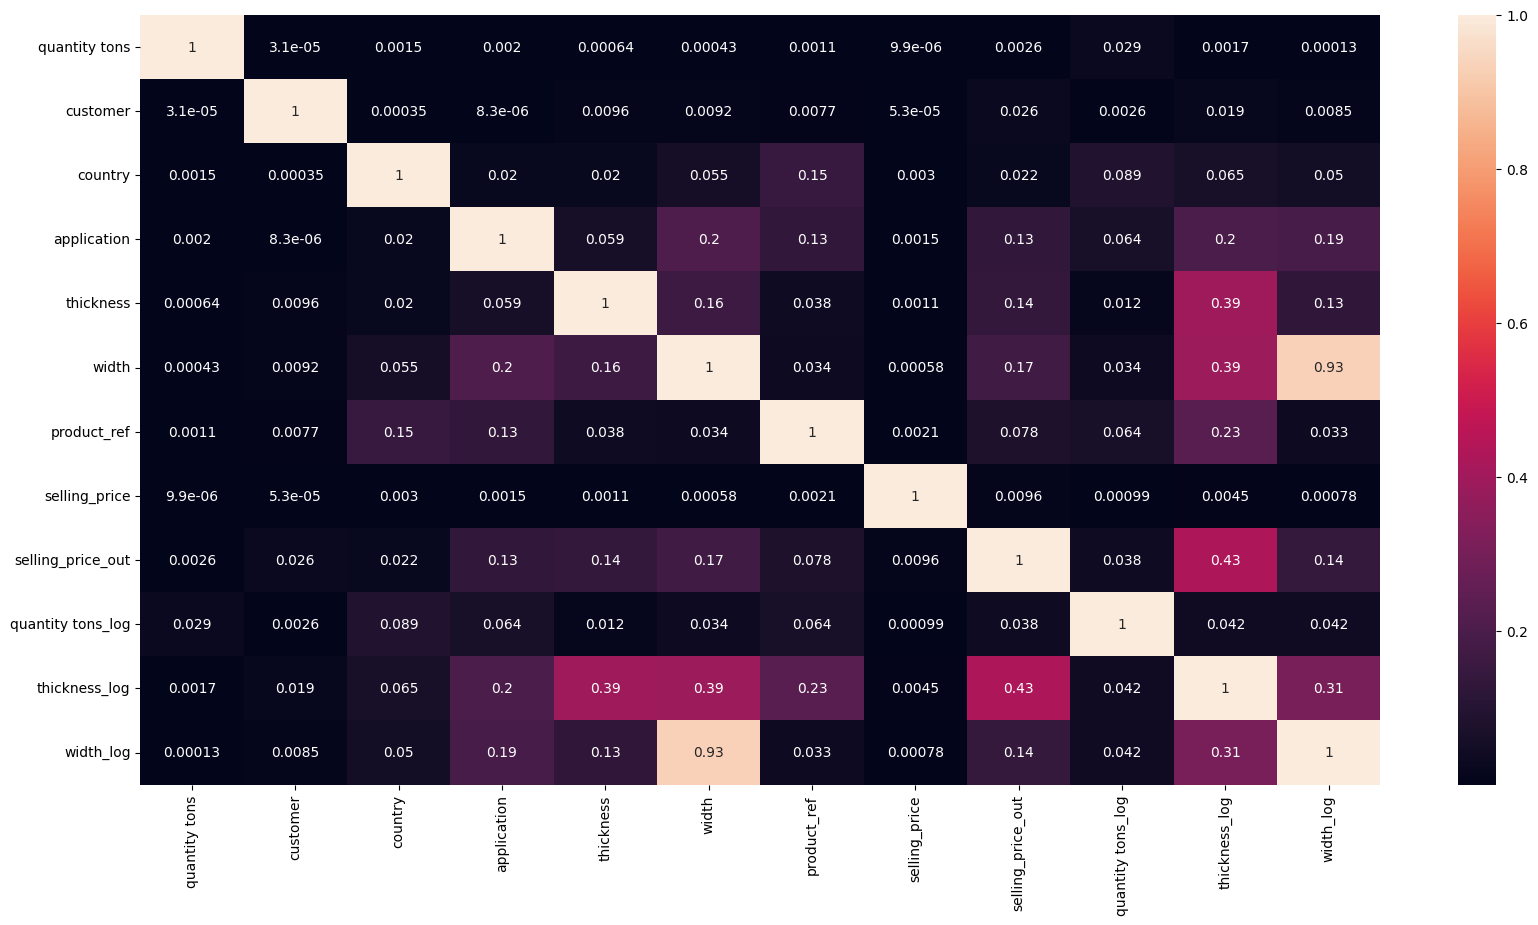

In [60]:
# Select only numeric columns from your DataFrame
numeric_data = data_1.select_dtypes(include=[np.number])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_data.corr().abs()
#if this code not working add [255] code top of this code
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

ENCODING (ONEHAT, LABEL,ORDINAL)

In [61]:
data_1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_out',
       'quantity tons_log', 'thickness_log', 'width_log'],
      dtype='object')

In [62]:
data_1.isna().sum()

id                   0
item_date            0
quantity tons        1
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_out    0
quantity tons_log    5
thickness_log        0
width_log            0
dtype: int64

In [63]:
data_1.dropna(inplace=True)

In [64]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(data_1[['item type']])
X_ohe = ohe.fit_transform(data_1[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(data_1[['status']])
X_be = ohe2.fit_transform(data_1[['status']]).toarray()

In [65]:
min(data_1['quantity tons']),max(data_1['quantity tons'])

(1e-05, 1000000000.0)

SCALE THE DATA

In [66]:
# independent features after encoding
X = np.concatenate((data_1[['quantity tons_log',
                       'application',
                       'thickness_log',
                       'width','country',
                       'customer',
                       'product_ref']].values, X_ohe, X_be), axis=1)

y=data_1['selling_price_out']

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

SPLIT THE DATA

In [68]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

MODEL FITING

In [69]:
# Building the model
extra_tree_model = ExtraTreesRegressor()

In [70]:
#training the model
et=extra_tree_model.fit(X_train, y_train)
#evaluting model
predict_val=extra_tree_model.predict(X_test)

EVALUVATION MATRICS

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE=mean_absolute_error(y_test,predict_val)
MSE=mean_squared_error(y_test,predict_val)
r2 = r2_score(y_test,predict_val)

print("MAE :",MAE,"\nMSE :",MSE,"\nR2 :",r2)

MAE : 85.08538506016927 
MSE : 14737.063652138375 
R2 : 0.6641112777696085


In [72]:
#linear regression

In [73]:
from sklearn.linear_model import LinearRegression


In [74]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [75]:
y_pred = model.predict(X_test)
y_pred

array([724.6336443 , 701.9539568 , 726.7820818 , ..., 749.7430193 ,
       718.87192555, 962.93442555])

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")


Mean Squared Error: 28804.62926467455
R-squared: 0.3434818260673119


In [77]:
print(len(X_test))
print(len(y_test))


18167
18167


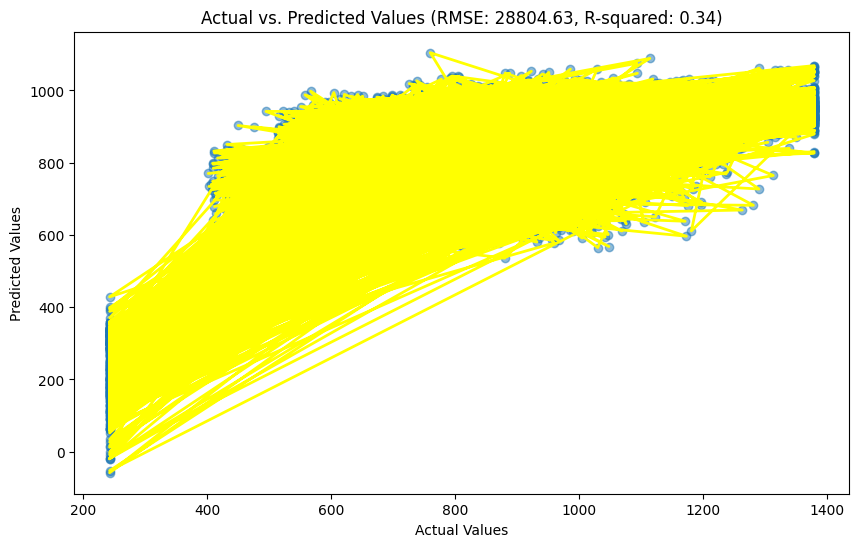

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(y_test, y_pred, color='yellow', linewidth=2)
plt.title(f'Actual vs. Predicted Values (RMSE: {mse:.2f}, R-squared: {r_squared:.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# DecisionTreeRegressor

In [79]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

In [80]:
# Create a Decision Tree Regressor object
regressor = DecisionTreeRegressor()

In [81]:
# Train the regressor on the training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [82]:
y_pred = regressor.predict(X_test)

In [83]:
# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 21015.028465806132
R-squared: 0.3434818260673119


In [84]:
data_1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_out',
       'quantity tons_log', 'thickness_log', 'width_log'],
      dtype='object')

In [85]:
data_1['status'].value_counts()

status
Won                116007
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4169
Draft                3139
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [86]:
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=extra_tree_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [87]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [88]:

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 16215.35087765445
R-squared: 0.630417998091329


In [89]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be
new_sample = np.array([[np.log(10), 10, np.log(240), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', (new_pred))

# clasification [ ExtraTreesClassifier ]

In [90]:
df_c = data_1[data_1['status'].isin(['Won', 'Lost'])]
df_class=df_c[[ 'customer','country',
               'item type','application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']]
Y=df_c['status']

In [91]:
len(Y)

150445

In [92]:
# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_class[['item type']])
X_ohe = ohe.fit_transform(df_class[['item type']]).toarray()

In [93]:
be = LabelBinarizer()
be.fit(Y) 
Y_fit = be.fit_transform(Y)

In [94]:
# independent features after encoding
X = np.concatenate((df_class[[ 'customer','country',
               'application','width',
               'product_ref','selling_price_out',
               'quantity tons_log','thickness_log']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [95]:
#SPLIT THE DATA

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_fit, test_size=0.2, random_state=42)


In [97]:
# Building the model
extra_tree_model_class = ExtraTreesClassifier()

In [98]:
extra_tree_model_class.fit(X_train, y_train)

ExtraTreesClassifier()

In [99]:
y_pred = extra_tree_model_class.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9314035029412743
Confusion Matrix:
[[ 5752  1170]
 [  894 22273]]


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6922
           1       0.95      0.96      0.96     23167

    accuracy                           0.93     30089
   macro avg       0.91      0.90      0.90     30089
weighted avg       0.93      0.93      0.93     30089



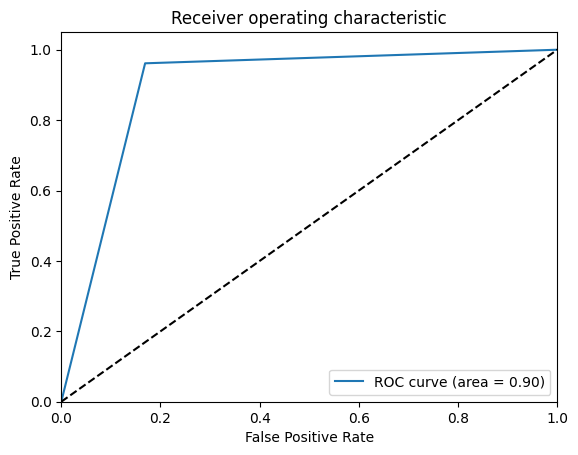

In [102]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [103]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(extra_tree_model_class, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [111]:
customer=30202938
country=28.0
application =10.0
width =1500
product_ref = 1670798778
selling_price_out =956
quantity_tons_log =np.log(700)
thickness_log =np.log(2)
status='W'

In [112]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[customer, country, application, width,product_ref,selling_price_out,quantity_tons_log,thickness_log,status]])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = extra_tree_model_class.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won
